By Drilon & Chia-Hua

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('OK: TensorFlow >= 2.0.0' + '.\033[0m')

2024-03-27 00:48:41.544689: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


OK: TensorFlow >= 2.0.0.


In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
X_train = X_train.reshape(-1, 3072)
X_test = X_test.reshape(-1, 3072)

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 3072)
(50000, 1)
(10000, 3072)
(10000, 1)


In [5]:
print(X_train[0].max(), X_train[0].min())

255 0


In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
n_classes = 10
Y_train = tf.keras.utils.to_categorical(y_train, n_classes)
Y_test = tf.keras.utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


# One-layer network and weight visualisation

In [8]:
E = 5
B = 128
L2 = 0.05
D = 32 * 32 * 3

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(n_classes, input_shape=(D,), activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(L2)))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


2024-03-27 00:48:45.598254: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log = model.fit(X_train, Y_train, batch_size=B, epochs=E, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/5
391/391 [==============================] - 8s 18ms/step - loss: 2.3250 - accuracy: 0.3001 - val_loss: 2.0152 - val_accuracy: 0.3294
Epoch 2/5
391/391 [==============================] - 8s 21ms/step - loss: 1.9919 - accuracy: 0.3313 - val_loss: 1.9915 - val_accuracy: 0.3275
Epoch 3/5
391/391 [==============================] - 7s 17ms/step - loss: 1.9797 - accuracy: 0.3331 - val_loss: 2.0033 - val_accuracy: 0.3201
Epoch 4/5
391/391 [==============================] - 6s 16ms/step - loss: 1.9914 - accuracy: 0.3283 - val_loss: 1.9883 - val_accuracy: 0.3399
Epoch 5/5
391/391 [==============================] - 7s 19ms/step - loss: 1.9857 - accuracy: 0.3301 - val_loss: 1.9933 - val_accuracy: 0.3188


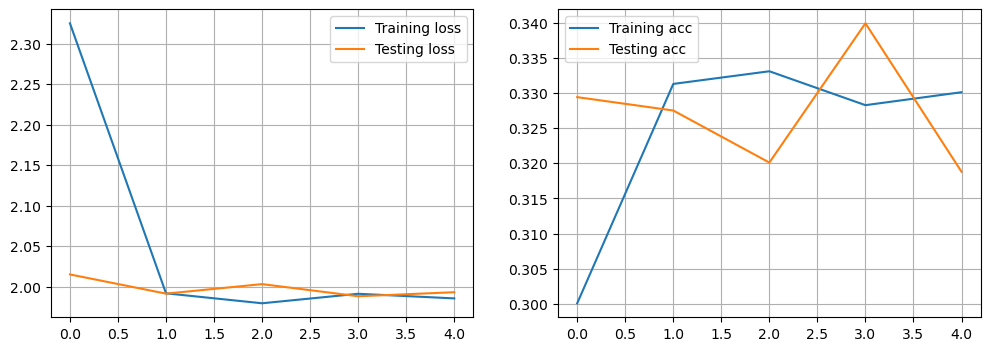

In [10]:
def plot_performance(model_log):
    f = plt.figure(figsize=(12,4))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax1.plot(model_log.history['loss'], label='Training loss')
    ax1.plot(model_log.history['val_loss'], label='Testing loss')
    ax1.legend()
    ax1.grid()
    ax2.plot(model_log.history['accuracy'], label='Training acc')
    ax2.plot(model_log.history['val_accuracy'], label='Testing acc')
    ax2.legend()
    ax2.grid()
    
plot_performance(log)

Poor performance as expected, loss is still kind of high and accuracy is very low. 

(3072, 10)
(10,)


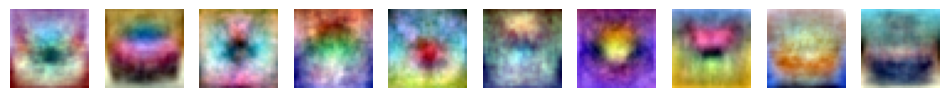

In [11]:
weights = model.get_weights()
for w in weights:
    print(w.shape)
w1 = weights[0]
f = plt.figure(figsize=(12,12))
for i in range(10):
    ax = f.add_subplot(1, 10, 1+i)
    im = w1[:,i]          
    im = im.reshape(32,32, 3)

    for j in range(3):  # Looping through the rgb channels
        min_val = np.min(im[:, :, j])
        max_val = np.max(im[:, :, j])
        im[:, :, j] = (im[:, :, j] - min_val) / (max_val - min_val) * 255
        
    im = np.round(im).astype(int)
    
    ax.axis('off')
    ax.imshow(im)

# Two-layers network

In [12]:
n_hidden = 128
E = 30
B = 128
D = 32 * 32 * 3

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(n_hidden, input_shape=(D,), activation='relu'))
model.add(tf.keras.layers.Dense(n_classes, input_shape=(D,), activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               393344    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log = model.fit(X_train, Y_train, batch_size=B, epochs=E, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/30
391/391 [==============================] - 12s 30ms/step - loss: 1.9067 - accuracy: 0.3196 - val_loss: 1.7722 - val_accuracy: 0.3670
Epoch 2/30
391/391 [==============================] - 14s 37ms/step - loss: 1.7365 - accuracy: 0.3851 - val_loss: 1.6973 - val_accuracy: 0.4021
Epoch 3/30
391/391 [==============================] - 15s 40ms/step - loss: 1.6762 - accuracy: 0.4044 - val_loss: 1.6362 - val_accuracy: 0.4175
Epoch 4/30
391/391 [==============================] - 12s 30ms/step - loss: 1.6372 - accuracy: 0.4204 - val_loss: 1.6641 - val_accuracy: 0.4075
Epoch 5/30
391/391 [==============================] - 10s 26ms/step - loss: 1.6056 - accuracy: 0.4330 - val_loss: 1.6725 - val_accuracy: 0.4085
Epoch 6/30
391/391 [==============================] - 9s 23ms/step - loss: 1.5867 - accuracy: 0.4392 - val_loss: 1.5976 - val_accuracy: 0.4314
Epoch 7/30
391/391 [==============================] - 9s 23ms/step - loss: 1.5641 - accuracy: 0.4477 - val_loss: 1.6003 - val_accuracy: 0

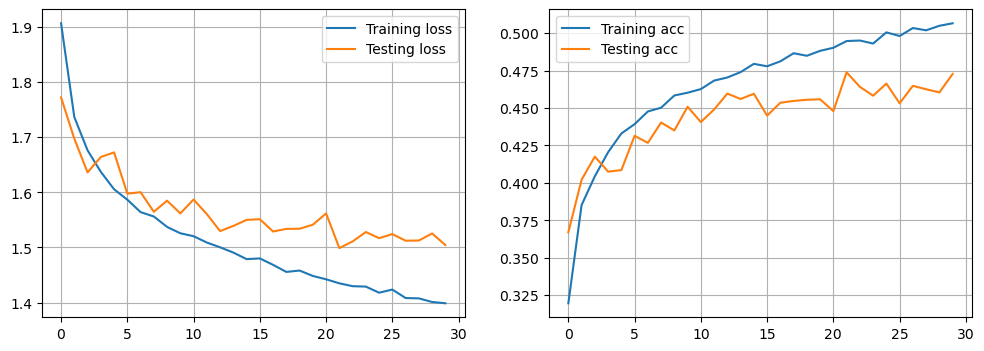

In [14]:
plot_performance(log)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               393344    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 411,146
Trainable params: 411,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
391/391 [==============================] - 10s 25ms/step - loss: 1.9037 - accuracy: 0.3146 - val_loss: 1.7316 - val_accuracy: 0.3750
Epoch 2/30
391/391 [==============================] - 8s 20ms/step - loss: 1.7008 - accuracy: 0.3926 - val_loss: 1.6760 - val_accuracy: 0.4003
Epoch 3/30
391/391 [=====

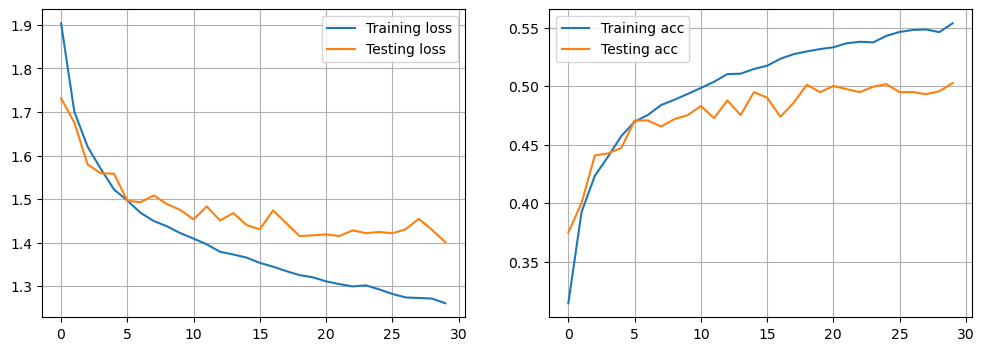

In [15]:
n_hidden = 128
E = 30
B = 128
D = 32 * 32 * 3

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(n_hidden, input_shape=(D,), activation='relu'))
model.add(tf.keras.layers.Dense(n_hidden, input_shape=(D,), activation='relu'))
model.add(tf.keras.layers.Dense(n_classes, input_shape=(D,), activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log = model.fit(X_train, Y_train, batch_size=B, epochs=E, verbose=1, validation_data=(X_test, Y_test))

plot_performance(log)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 384)               1180032   
                                                                 
 dense_7 (Dense)             (None, 256)               98560     
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,312,778
Trainable params: 1,312,778
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
391/391 [==============================] - 13s 31ms/step - loss: 1.8857 - accuracy: 0.3183 - val_loss: 1.7188 - val_accuracy: 0.3798
Epoch 2/30
391/391 [============

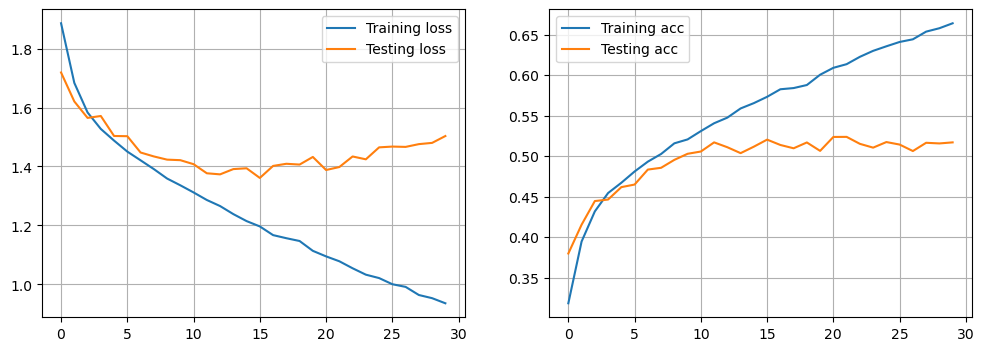

In [16]:
E = 30
B = 128
D = 32 * 32 * 3

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(384, input_shape=(D,), activation='relu'))
model.add(tf.keras.layers.Dense(256, input_shape=(D,), activation='relu'))
model.add(tf.keras.layers.Dense(128, input_shape=(D,), activation='relu'))
model.add(tf.keras.layers.Dense(10, input_shape=(D,), activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log = model.fit(X_train, Y_train, batch_size=B, epochs=E, verbose=1, validation_data=(X_test, Y_test))

plot_performance(log)

### just curious where this goes so we let the same model run for additional 30 epochs:

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 384)               1180032   
                                                                 
 dense_7 (Dense)             (None, 256)               98560     
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,312,778
Trainable params: 1,312,778
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
391/391 [==============================] - 13s 31ms/step - loss: 0.9208 - accuracy: 0.6684 - val_loss: 1.5093 - val_accuracy: 0.5155
Epoch 2/30
391/391 [============

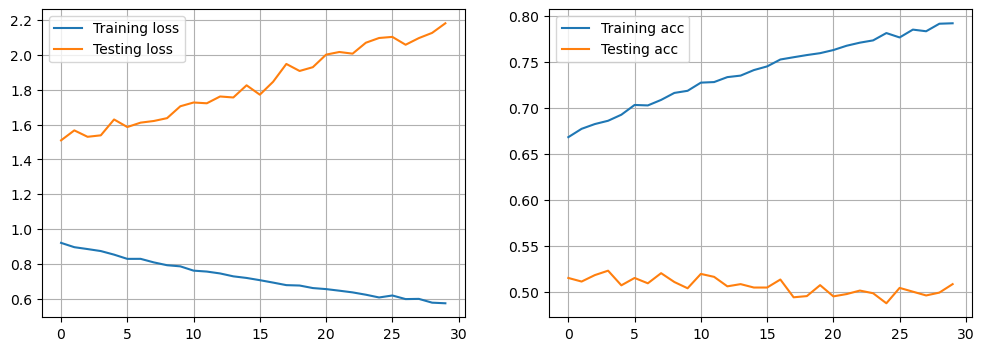

In [17]:
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log = model.fit(X_train, Y_train, batch_size=B, epochs=30, verbose=1, validation_data=(X_test, Y_test))

plot_performance(log)

No improvement on the test set, so the additional training isn't justified. So we got the best performance with this model but already with training to epoch 15-20. But best performance here means a test accuracy around ~51% which isn't great but makes sense for a dense layered network to perform on complex images, since these kind of networks don't account for spatial structure in the input data.

# CNN on CIFAR10

In [18]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(X_train.shape)
print(y_train.shape)
X_train = X_train / 255.0
X_test = X_test / 255.0
n_classes = 10
Y_train = tf.keras.utils.to_categorical(y_train, n_classes)
Y_test = tf.keras.utils.to_categorical(y_test, n_classes)

(50000, 32, 32, 3)
(50000, 1)


In [19]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (1,1), padding='same', input_shape=X_train.shape[1:]))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(n_classes))
model.add(tf.keras.layers.Activation('softmax'))

# model.summary()

Epoch 1/30
391/391 [==============================] - 21s 52ms/step - loss: 1.7769 - accuracy: 0.3783 - val_loss: 1.6306 - val_accuracy: 0.4295
Epoch 2/30
391/391 [==============================] - 20s 50ms/step - loss: 1.5879 - accuracy: 0.4515 - val_loss: 1.5456 - val_accuracy: 0.4615
Epoch 3/30
391/391 [==============================] - 19s 49ms/step - loss: 1.5313 - accuracy: 0.4707 - val_loss: 1.5247 - val_accuracy: 0.4714
Epoch 4/30
391/391 [==============================] - 20s 51ms/step - loss: 1.4924 - accuracy: 0.4849 - val_loss: 1.4888 - val_accuracy: 0.4814
Epoch 5/30
391/391 [==============================] - 19s 49ms/step - loss: 1.4671 - accuracy: 0.4910 - val_loss: 1.4663 - val_accuracy: 0.4917
Epoch 6/30
391/391 [==============================] - 19s 48ms/step - loss: 1.4437 - accuracy: 0.4993 - val_loss: 1.4588 - val_accuracy: 0.4833
Epoch 7/30
391/391 [==============================] - 18s 46ms/step - loss: 1.4242 - accuracy: 0.5072 - val_loss: 1.4463 - val_accuracy:

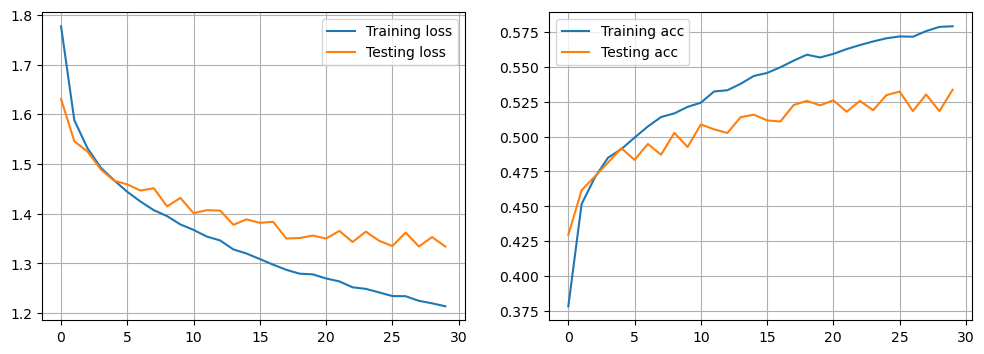

In [20]:
E = 30
B = 128
D = 32 * 32 * 3

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log = model.fit(X_train, Y_train, batch_size=B, epochs=E, verbose=1, validation_data=(X_test, Y_test))

plot_performance(log)

Not really much better but the difference in training and testing accuracy is smaller, so we have a model which can generalise better than the ones beforehand.

In [21]:
model.summary()
model.get_config()
model.evaluate(X_test, Y_test)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        128       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 10)                81930     
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                      

[1.333738923072815, 0.5335999727249146]

Epoch 1/30
391/391 [==============================] - 47s 118ms/step - loss: 1.7083 - accuracy: 0.3967 - val_loss: 1.4724 - val_accuracy: 0.4791
Epoch 2/30
391/391 [==============================] - 45s 115ms/step - loss: 1.4257 - accuracy: 0.4996 - val_loss: 1.3801 - val_accuracy: 0.5132
Epoch 3/30
391/391 [==============================] - 46s 117ms/step - loss: 1.3401 - accuracy: 0.5280 - val_loss: 1.3147 - val_accuracy: 0.5316
Epoch 4/30
391/391 [==============================] - 46s 118ms/step - loss: 1.2986 - accuracy: 0.5453 - val_loss: 1.2889 - val_accuracy: 0.5440
Epoch 5/30
391/391 [==============================] - 46s 117ms/step - loss: 1.2681 - accuracy: 0.5552 - val_loss: 1.2789 - val_accuracy: 0.5456
Epoch 6/30
391/391 [==============================] - 45s 115ms/step - loss: 1.2436 - accuracy: 0.5673 - val_loss: 1.2891 - val_accuracy: 0.5446
Epoch 7/30
391/391 [==============================] - 45s 115ms/step - loss: 1.2210 - accuracy: 0.5728 - val_loss: 1.2401 - val_ac

[1.1909353733062744, 0.5842999815940857]

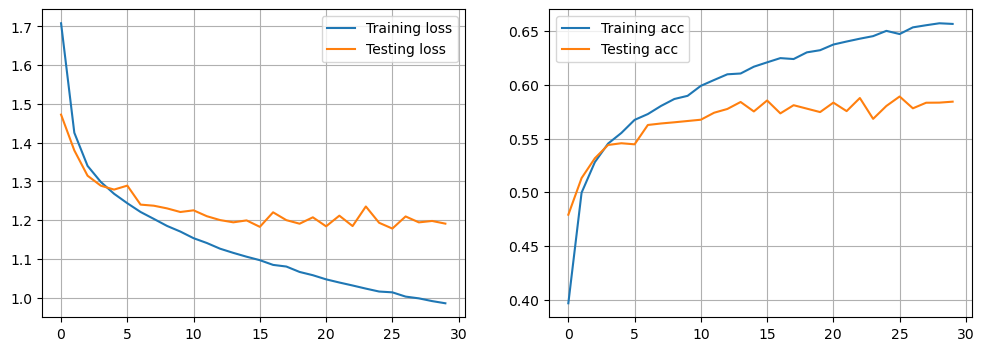

In [22]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (1,1), padding='same', input_shape=X_train.shape[1:]))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(32, (1,1), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(64, (1,1), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(64, (1,1), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(n_classes))
model.add(tf.keras.layers.Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log = model.fit(X_train, Y_train, batch_size=B, epochs=E, verbose=1, validation_data=(X_test, Y_test))

plot_performance(log)

model.summary()
model.get_config()
model.evaluate(X_test, Y_test)

Epoch 1/30
391/391 [==============================] - 128s 325ms/step - loss: 1.4977 - accuracy: 0.4546 - val_loss: 1.1255 - val_accuracy: 0.5961
Epoch 2/30
391/391 [==============================] - 126s 322ms/step - loss: 0.9652 - accuracy: 0.6599 - val_loss: 0.9011 - val_accuracy: 0.6831
Epoch 3/30
391/391 [==============================] - 127s 325ms/step - loss: 0.7553 - accuracy: 0.7371 - val_loss: 0.7593 - val_accuracy: 0.7367
Epoch 4/30
391/391 [==============================] - 127s 324ms/step - loss: 0.6094 - accuracy: 0.7880 - val_loss: 0.7866 - val_accuracy: 0.7343
Epoch 5/30
391/391 [==============================] - 127s 325ms/step - loss: 0.4869 - accuracy: 0.8272 - val_loss: 0.6939 - val_accuracy: 0.7677
Epoch 6/30
391/391 [==============================] - 125s 320ms/step - loss: 0.3642 - accuracy: 0.8743 - val_loss: 0.7658 - val_accuracy: 0.7586
Epoch 7/30
391/391 [==============================] - 127s 325ms/step - loss: 0.2549 - accuracy: 0.9118 - val_loss: 0.8442 -

[2.1635749340057373, 0.7455000281333923]

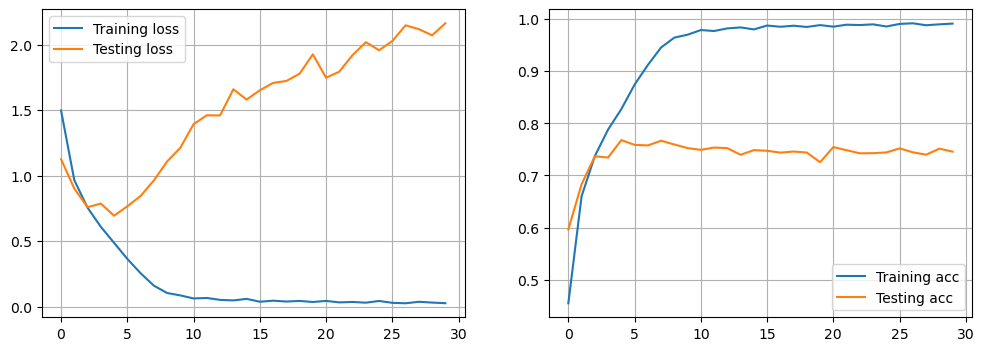

In [23]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', input_shape=X_train.shape[1:]))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log = model.fit(X_train, Y_train, batch_size=B, epochs=E, verbose=1, validation_data=(X_test, Y_test))

plot_performance(log)

model.summary()
model.get_config()
model.evaluate(X_test, Y_test)

Epoch 1/15
391/391 [==============================] - 157s 399ms/step - loss: 1.2851 - accuracy: 0.5343 - val_loss: 1.5042 - val_accuracy: 0.6070
Epoch 2/15
391/391 [==============================] - 154s 393ms/step - loss: 0.8230 - accuracy: 0.7110 - val_loss: 0.9175 - val_accuracy: 0.6806
Epoch 3/15
391/391 [==============================] - 155s 398ms/step - loss: 0.6278 - accuracy: 0.7813 - val_loss: 0.7863 - val_accuracy: 0.7334
Epoch 4/15
391/391 [==============================] - 155s 396ms/step - loss: 0.4973 - accuracy: 0.8252 - val_loss: 0.7973 - val_accuracy: 0.7511
Epoch 5/15
391/391 [==============================] - 157s 402ms/step - loss: 0.3860 - accuracy: 0.8649 - val_loss: 0.7932 - val_accuracy: 0.7457
Epoch 6/15
391/391 [==============================] - 155s 396ms/step - loss: 0.2824 - accuracy: 0.9011 - val_loss: 0.7889 - val_accuracy: 0.7738
Epoch 7/15
391/391 [==============================] - 155s 396ms/step - loss: 0.1929 - accuracy: 0.9321 - val_loss: 0.8737 -

[1.395854115486145, 0.7648000121116638]

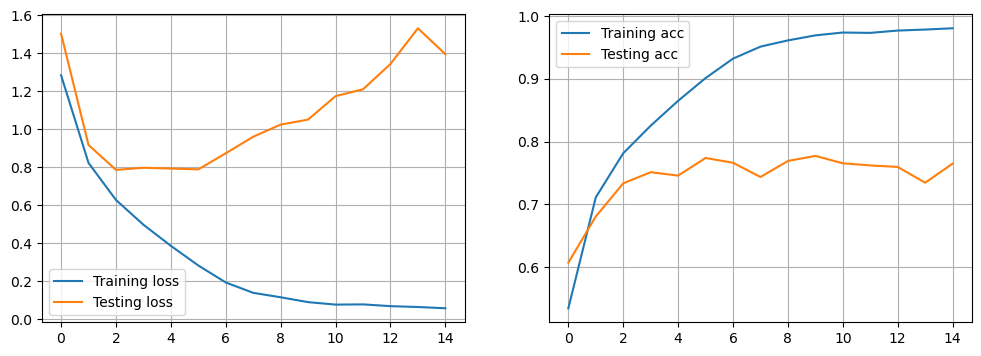

In [24]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', input_shape=X_train.shape[1:]))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(96, (3,3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(96, (3,3), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log = model.fit(X_train, Y_train, batch_size=B, epochs=15, verbose=1, validation_data=(X_test, Y_test))

plot_performance(log)

model.summary()
model.get_config()
model.evaluate(X_test, Y_test)

Epoch 1/15
391/391 [==============================] - 306s 779ms/step - loss: 2.1694 - accuracy: 0.1786 - val_loss: 3.1162 - val_accuracy: 0.1582
Epoch 2/15
391/391 [==============================] - 304s 777ms/step - loss: 1.3793 - accuracy: 0.4934 - val_loss: 1.6166 - val_accuracy: 0.4010
Epoch 3/15
391/391 [==============================] - 305s 779ms/step - loss: 1.0850 - accuracy: 0.6085 - val_loss: 1.1906 - val_accuracy: 0.5657
Epoch 4/15
391/391 [==============================] - 302s 773ms/step - loss: 0.9364 - accuracy: 0.6669 - val_loss: 0.8935 - val_accuracy: 0.6821
Epoch 5/15
391/391 [==============================] - 304s 778ms/step - loss: 0.8327 - accuracy: 0.7066 - val_loss: 0.9307 - val_accuracy: 0.6838
Epoch 6/15
391/391 [==============================] - 305s 781ms/step - loss: 0.7622 - accuracy: 0.7328 - val_loss: 0.9872 - val_accuracy: 0.6670
Epoch 7/15
391/391 [==============================] - 304s 779ms/step - loss: 0.7037 - accuracy: 0.7553 - val_loss: 0.8539 -

[0.6273471117019653, 0.7965999841690063]

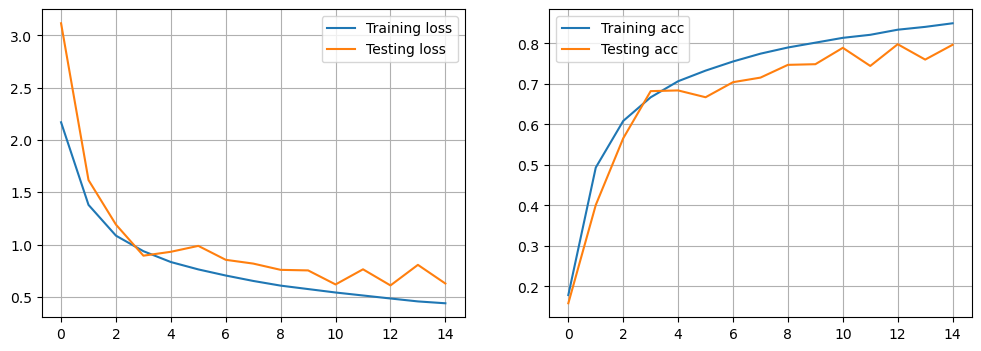

In [25]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', input_shape=X_train.shape[1:]))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Conv2D(96, (3,3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(96, (3,3), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Conv2D(128, (3,3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(128, (3,3), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log = model.fit(X_train, Y_train, batch_size=B, epochs=15, verbose=1, validation_data=(X_test, Y_test))

plot_performance(log)

model.summary()
model.get_config()
model.evaluate(X_test, Y_test)

| CNN | Architecture | Loss test | Acc. test % |
|-----|--------------|-----------|-------------|
| 1   | Layer 1: CONV D=32, w=1x1, P='same', Activation='relu' <br> Layer 2: MAXPOOL 2x2, Flatten, DENSE for n_classes, Activation='softmax' | 1.33      | 53.36% |
| 2   | Layer 1: CONV D=32, w=1x1, P='same', Activation='relu' <br> Layer 2: CONV D=32, w=1x1, P='same', Activation='relu', MAXPOOL 2x2 <br> Layer 3: CONV D=64, w=1x1, P='same', Activation='relu' <br> Layer 4: CONV D=64, w=1x1, P='same', Activation='relu', MAXPOOL 2x2, Flatten, DENSE for n_classes, Activation='softmax' | 1.19      | 58.43% |
| 3   | Layer 1: CONV D=32, w=3x3, P='same', Activation='relu' <br> Layer 2: CONV D=32, w=3x3, P='same', Activation='relu', MAXPOOL 2x2 <br> Layer 3: CONV D=64, w=3x3, P='same', Activation='relu' <br> Layer 4: CONV D=64, w=3x3, P='same', Activation='relu', MAXPOOL 2x2, Flatten, DENSE 512, Activation='relu', DENSE 10, Activation='softmax' | 2.16      | 74.55% |
| 4   | Layer 1: CONV D=32, w=3x3, P='same', Activation='relu' <br> Layer 2: CONV D=32, w=3x3, P='same', Activation='relu', MAXPOOL 2x2 <br> Layer 3: CONV D=64, w=3x3, P='same', Activation='relu' <br> Layer 4: CONV D=64, w=3x3, P='same', Activation='relu', MAXPOOL 2x2 <br> Layer 5: CONV D=96, w=3x3, P='same', BatchNormalization, Activation='relu' <br> Layer 6: CONV D=96, w=3x3, P='same', Activation='relu', MAXPOOL 2x2, Flatten, DENSE 512, Activation='relu', DENSE 10, Activation='softmax' | 1.40      | 76.48% |
| 5   | Layer 1: CONV D=32, w=3x3, P='same', BatchNormalization, Activation='relu' <br> Layer 2: CONV D=32, w=3x3, P='same', Activation='relu', MAXPOOL 2x2, Dropout 0.1 <br> Layer 3: CONV D=64, w=3x3, P='same', BatchNormalization, Activation='relu' <br> Layer 4: CONV D=64, w=3x3, P='same', Activation='relu', MAXPOOL 2x2, Dropout 0.1 <br> Layer 5: CONV D=96, w=3x3, P='same', BatchNormalization, Activation='relu' <br> Layer 6: CONV D=96, w=3x3, P='same', Activation='relu', Dropout 0.1 <br> Layer 7: CONV D=128, w=3x3, P='same', BatchNormalization, Activation='relu' <br> Layer 8: CONV D=128, w=3x3, P='same', Activation='relu', Dropout 0.2, Flatten, DENSE 1024, Activation='relu', Dropout 0.25, DENSE 10, Activation='softmax' | 0.63      | 79.66% |
